### MDS

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler 

In [2]:
from sklearn.manifold import MDS

iris = load_iris()

x = iris.data
y = iris.target

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


dissimilarity :euclidean, precomputed

In [3]:
mds = MDS(n_components=2,dissimilarity='euclidean')
reduce_dim = mds.fit_transform(x)

In [4]:
mds_df = pd.DataFrame(data=reduce_dim, columns = ['PC1', 'PC2'])
mds_df.head()

,PC1,PC2
0,-1.968220,-1.879461
1,-2.314453,-1.458349
2,-2.405204,-1.637045
3,-2.403240,-1.390565
4,-1.988070,-1.934078


In [5]:
pc_y = np.c_[reduce_dim,y]

In [6]:
df = pd.DataFrame(pc_y,columns=['PC1','PC2','target'])

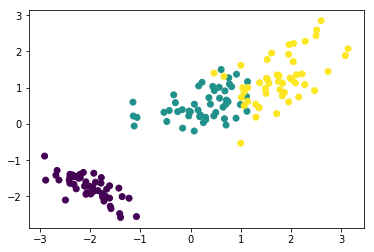

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x=df['PC1'],y=df['PC2'],c=df['target'])

### PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://m.blog.naver.com/PostView.nhn?blogId=tjdrud1323&logNo=221720259834&proxyReferer=https:%2F%2Fwww.google.com%2F

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler 

In [9]:
iris = load_iris()

x = iris.data
y = iris.target

# 데이터 스케일링
x = StandardScaler().fit_transform(x)

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


n_components : 주성분 개수   

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(x)

In [12]:
# 주성분으로 이루어진 데이터 프레임
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['PC1', 'PC2'])

In [13]:
principalDf.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [14]:
pc_y = np.c_[printcipalComponents,y]
df = pd.DataFrame(pc_y,columns=['PC1','PC2','target'])

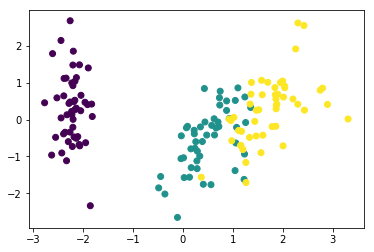

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x=df['PC1'],y=df['PC2'],c=df['target'])

#### 주성분 개수 결정

In [16]:
pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(x)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.72962445 0.22850762]
0.9581320720000164


In [17]:
pca = PCA(n_components=3)
printcipalComponents = pca.fit_transform(x)

pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

주성분 개수를 늘리더라도 분산량이 많이 증가하지 않기 때문에 주성분 개수를 2로 설정

### KPCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

https://dnai-deny.tistory.com/18

In [33]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=0)

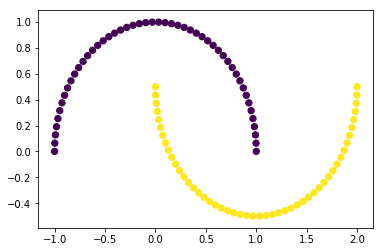

In [34]:
plt.scatter(X[:,0], X[:,1], s=40, c=y)

kernel : linear, poly, rbf, sigmoid, cosine, precomputed

In [53]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

In [54]:
X_skernpca.shape

(100, 2)

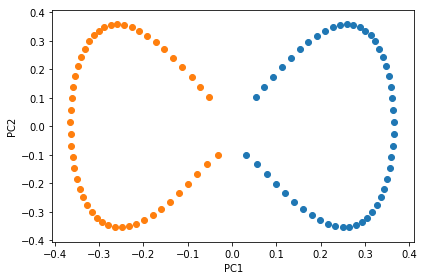

In [55]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1])
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

### Isomap

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

n_neighbors : 각 포인트에 대해 고려할 이웃 수  

In [96]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap

X, t = make_swiss_roll(n_samples=1000, random_state=0)

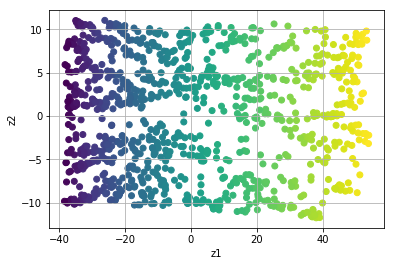

In [107]:
Iso = Isomap(n_components=2, n_neighbors=10)
Iso.fit(X)

X_reduced = Iso.transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t)
plt.xlabel("z1")
plt.ylabel("z2")
plt.grid(True)
plt.show()

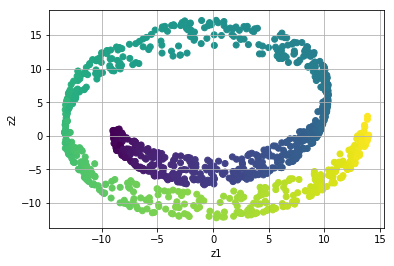

In [109]:
Iso = Isomap(n_components=2, n_neighbors=100)
Iso.fit(X)

X_reduced = Iso.transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t)
plt.xlabel("z1")
plt.ylabel("z2")
plt.grid(True)
plt.show()

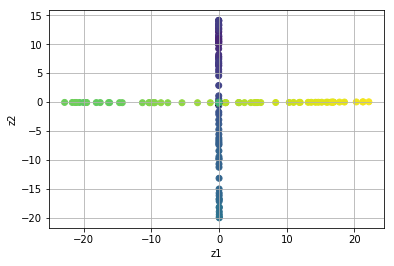

In [105]:
Iso = Isomap(n_components=2, n_neighbors=2)
Iso.fit(X)

X_reduced = Iso.transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t)
plt.xlabel("z1")
plt.ylabel("z2")
plt.grid(True)
plt.show()

### LLE

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

https://excelsior-cjh.tistory.com/168

n_components : 매니폴드 좌표 수  
n_neighbors : 각 포인트에 대해 고려할 이웃 수  

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X, t = make_swiss_roll(n_samples=1000, random_state=0)

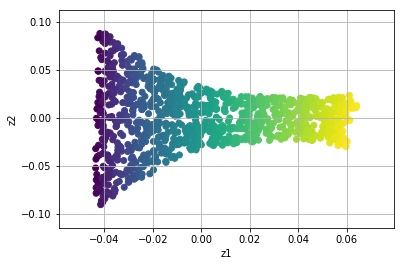

In [110]:
lle = LocallyLinearEmbedding(
    n_components=2, n_neighbors=10, random_state=0)
lle.fit(X)

X_reduced = lle.transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t)
plt.xlabel("z1")
plt.ylabel("z2")
plt.grid(True)
plt.show()

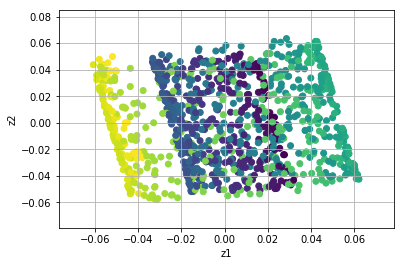

In [115]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=100, random_state=0)
lle.fit(X)

X_reduced = lle.transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t)
plt.xlabel("z1")
plt.ylabel("z2")
plt.grid(True)
plt.show()

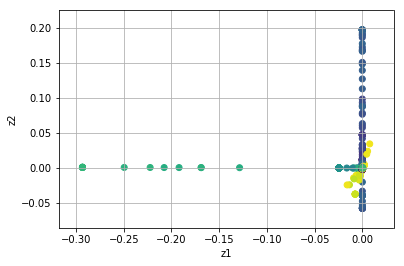

In [117]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=3, random_state=0)
lle.fit(X)

X_reduced = lle.transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t)
plt.xlabel("z1")
plt.ylabel("z2")
plt.grid(True)
plt.show()